<a href="https://colab.research.google.com/github/apotnis07/Airline-Passenger-Satisfaction/blob/main/Airline_Passenger_Satisfaction_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/ML Project"
!pwd

/content/drive/MyDrive/ML Project
/content/drive/MyDrive/ML Project


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math

In [ ]:
#Loading the dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.drop(df_train.columns[0],axis=1,inplace=True)
df_test.drop(df_test.columns[0],axis=1,inplace=True)
df_train.drop("id", axis = 1, inplace = True)
df_test.drop("id", axis = 1, inplace = True)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df_train = df_train.dropna()
df_test = df_test.dropna()


In [ ]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<Axes: xlabel='satisfaction', ylabel='count'>

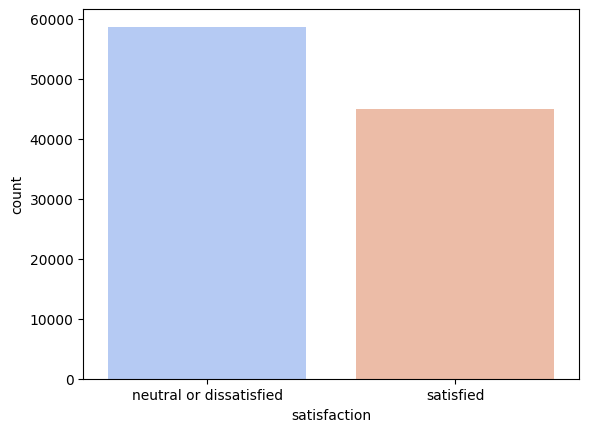

In [ ]:
sns.countplot(data=df_train, x="satisfaction", palette = "coolwarm")

<Axes: xlabel='Gender', ylabel='count'>

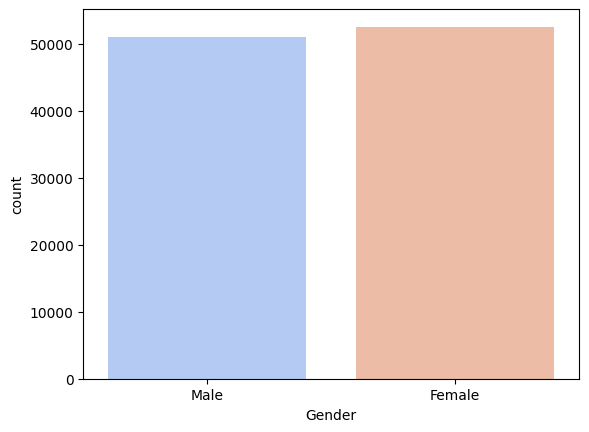

In [ ]:
sns.countplot(data=df_train, x="Gender", palette = "coolwarm")

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Type of Travel']=label_encoder.fit_transform(df_train['Type of Travel'])
df_train['Class']=label_encoder.fit_transform(df_train['Class'])
df_train['Customer Type']=label_encoder.fit_transform(df_train['Customer Type'])
df_train['satisfaction']=label_encoder.fit_transform(df_train['satisfaction'])
df_train['Gender']=label_encoder.fit_transform(df_train['Gender'])
df_test['Type of Travel']=label_encoder.fit_transform(df_test['Type of Travel'])
df_test['Class']=label_encoder.fit_transform(df_test['Class'])
df_test['Customer Type']=label_encoder.fit_transform(df_test['Customer Type'])
df_test['satisfaction']=label_encoder.fit_transform(df_test['satisfaction'])
df_test['Gender']=label_encoder.fit_transform(df_test['Gender'])

<ipython-input-9-66cc40e1da4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Type of Travel']=label_encoder.fit_transform(df_train['Type of Travel'])
<ipython-input-9-66cc40e1da4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Class']=label_encoder.fit_transform(df_train['Class'])
<ipython-input-9-66cc40e1da4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
# Remember to include feature selection for slides and write code here

In [ ]:
df_train = df_train.drop(['Gender','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)
df_test = df_test.drop(['Gender','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler


X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

reg = LogisticRegression(max_iter = 200)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8701579577491986

In [ ]:
df_train

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,13,1,2,460,3,3,5,3,5,5,4,3,4,4,5,5,0
1,1,25,0,0,235,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,26,0,0,1142,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,25,0,0,562,2,5,2,2,2,2,2,5,3,1,4,2,0
4,0,61,0,0,214,3,3,4,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,23,0,1,192,2,2,2,2,2,2,3,1,4,2,3,2,0
103900,0,49,0,0,2347,4,4,2,4,5,5,5,5,5,5,5,4,1
103901,1,30,0,0,1995,1,1,4,1,5,4,3,2,4,5,5,4,0
103902,1,22,0,1,1000,1,1,1,1,1,1,4,5,1,5,4,1,0


In [ ]:
# plt.bar(df_train['satisfaction'], df_train['Flight Distance'])
df_train['Flight Distance'].describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [ ]:
X_train.shape[1]

17

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
'''
k = np.arange(1,11)
accuracy=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
plt.plot(k,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('K values')
plt.show()
'''
# knn=KNeighborsClassifier(n_neighbors=9)
# knn.fit(X_train,y_train)
# y_pred=knn.predict(X_test)
# accuracy_score(y_test,y_pred)

"\nk = np.arange(1,11)\naccuracy=[]\nfor i in range(1,11):\n    knn=KNeighborsClassifier(n_neighbors=i)\n    knn.fit(X_train,y_train)\n    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))\nplt.plot(k,accuracy)\nplt.ylabel('Accuracy')\nplt.xlabel('K values')\nplt.show()\n"

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(128, activation='relu', input_dim=17))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

Epoch 1/20
518/518 [==============================] - 4s 5ms/step - loss: 0.2717 - accuracy: 0.8895 - mse: 0.0826 - val_loss: 0.1766 - val_accuracy: 0.9297 - val_mse: 0.0519
Epoch 2/20
518/518 [==============================] - 2s 4ms/step - loss: 0.1599 - accuracy: 0.9357 - mse: 0.0475 - val_loss: 0.1457 - val_accuracy: 0.9408 - val_mse: 0.0431
Epoch 3/20
518/518 [==============================] - 2s 4ms/step - loss: 0.1435 - accuracy: 0.9408 - mse: 0.0430 - val_loss: 0.1329 - val_accuracy: 0.9462 - val_mse: 0.0396
Epoch 4/20
518/518 [==============================] - 2s 4ms/step - loss: 0.1345 - accuracy: 0.9447 - mse: 0.0404 - val_loss: 0.1286 - val_accuracy: 0.9474 - val_mse: 0.0385
Epoch 5/20
518/518 [==============================] - 2s 4ms/step - loss: 0.1290 - accuracy: 0.9467 - mse: 0.0389 - val_loss: 0.1408 - val_accuracy: 0.9415 - val_mse: 0.0426
Epoch 6/20
518/518 [==============================] - 3s 6ms/step - loss: 0.1254 - accuracy: 0.9484 - mse: 0.0379 - val_loss: 0.12

[]

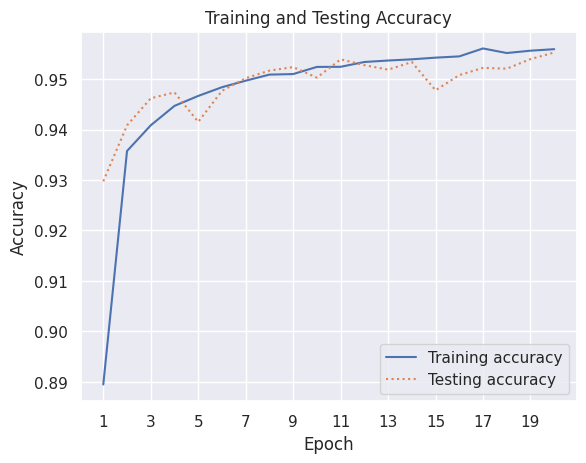

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, 21, step=2))
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

[]

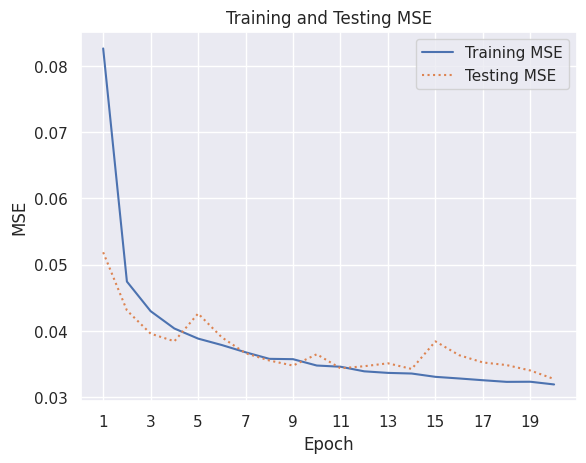

In [ ]:
mse = hist.history['mse']
val = hist.history['val_mse']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, '-', label='Training MSE')
plt.plot(epochs, val, ':', label='Testing MSE')
plt.title('Training and Testing MSE')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, 21, step=2))
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.plot()

In [ ]:
df_train['Flight Distance'].describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [ ]:
def f(row):
    if row['Flight Distance'] < 500:
        val = "1_Less than 500"
    elif row['Flight Distance'] <= 1000:
        val = "2_501 to 1000"
    elif row['Flight Distance'] <= 1500:
        val = "3_1001 to 1500"
    else:
        val = "4_1500 plus"
    return val
# print(baseline)
new_df2 = pd.DataFrame()
new_df2['Flight Distance'] = df_train.apply(f, axis=1)

In [ ]:

new_df2['satisfaction'] = df_train['satisfaction']

# new_df2.reset_index(inplace=True)
# new_df2['index'] = new_df2['index'].astype(int)
new_df2

,Flight Distance,satisfaction
0,1_Less than 500,0
1,1_Less than 500,0
2,3_1001 to 1500,1
3,2_501 to 1000,0
4,1_Less than 500,1
...,...,...
103899,1_Less than 500,0
103900,4_1500 plus,1
103901,4_1500 plus,0
103902,2_501 to 1000,0


In [ ]:
new_df2 = new_df2.groupby(new_df2['Flight Distance']).value_counts().reset_index().sort_index(ascending=True)
new_df2.rename(columns={0:'Count'}, inplace=True)
# new_df2
new_df2

,Flight Distance,satisfaction,Count
0,1_Less than 500,0,21386
1,1_Less than 500,1,10686
2,2_501 to 1000,0,18778
3,2_501 to 1000,1,9052
4,3_1001 to 1500,0,7844
5,3_1001 to 1500,1,4475
6,4_1500 plus,1,20684
7,4_1500 plus,0,10689


<Axes: xlabel='Flight Distance', ylabel='Count'>

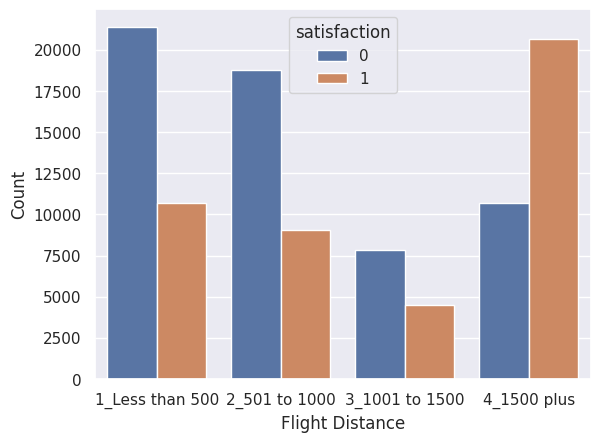

In [ ]:
import seaborn as sns
sns.barplot(new_df2, x=new_df2['Flight Distance'], y=new_df2['Count'], hue=new_df2['satisfaction'])